In [2]:
import json
import re
import os
import glob
import re
import konlpy
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from collections import Counter
import numpy as np
import pyLDAvis.gensim
import pandas as pd

In [3]:
okt = konlpy.tag.Okt()
kkma =  konlpy.tag.Kkma()

### 데이터 불러오기 및 **백성** 이 포함된 날짜 남기기

In [4]:
def data_clean(filepath,keyword):
    dir =filepath
    file_list = glob.glob(dir+'*.txt')
    text_list=[]
    for fname in file_list:
        with open(fname, 'r', encoding='utf-8') as f:
            text = f.read()
        text_list = text_list + text.split("=====")
        text_list =[text for text in text_list if keyword in text]
        clean_text = []
        for line in range(len(text_list)):
            clean_text.append(re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','',text_list[line]))
    return clean_text

In [5]:
data_list = data_clean('25대철종/','백성')

### 불용어 제거 후, **명사,형용사** 만 남기기

In [8]:
stopword = ['인하여','이러한','없던','있는','어찌',
            '년','월','일','실록','오히려','번째기사','하라',
           '입니다','있으셔야','입니다하니','마땅히','없습니다',
           '같았습니다','마땅히','오니','뿐이겠습니까','있으니',
            '바야흐로','이르렀기','있으면서','같습니다','실록','반드시',
           '있어','우리','있었던','같습니다','더하여','아름다','있었는데',
           '있겠는가','철종','철종실록','정조','정조실록',
           '순조','순조실록','헌종','헌종실록','경종','경종실록','고종','고종실록','순종','순종실록',
           '하소','있을']

In [9]:
def postag(data_list):
    word_temp =[]
    for i in range(len(data_list)):
        word = okt.pos(''.join(data_list[i]))
        word_temp2=[]
        for j in word:
            if len(j[0])>1 and j[0] not in stopword:
                if j[1] in ['Noun', 'Adjective']: #명사, 형용사
                    word_temp2.append(j[0])
        word_temp.append(word_temp2)
    return word_temp

In [202]:
# def postag(data_list):
#     for i,document in enumerate(data_list):
#         word_temp =[]
#         for word in okt.pos(document):
#             if word[1] in ['Noun', 'Adjective']: #명사, 형용사
#                 if len(word[0])>1 and j[0] not in stopword:
#                     word_temp.append(word[0])
#     return np.array(word_temp)

In [10]:
word_list =  postag(data_list)

### 단어들을 가지고 LDA모델링

In [240]:
def topic(word):
    dictionary = corpora.Dictionary(word)
    corpus = [dictionary.doc2bow(text) for text in word]
    NUM_TOPICS = 15
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    topics = ldamodel.print_topics(num_words=4)
    topic_list = []
    for topic in topics:
        topic_list.append(topic)
    return topic_list

In [241]:
topic(word_list)

[(0, '0.009*"수가" + 0.009*"마음" + 0.008*"사람" + 0.008*"백성"'),
 (1, '0.012*"기사" + 0.011*"함풍" + 0.011*"고을" + 0.008*"위유"'),
 (2, '0.011*"윤선거" + 0.010*"백성" + 0.010*"윤증" + 0.009*"선정"'),
 (3, '0.010*"절목" + 0.008*"수가" + 0.007*"지금" + 0.007*"백성"'),
 (4, '0.011*"소자" + 0.009*"마음" + 0.009*"백성" + 0.009*"자성"'),
 (5, '0.143*"태백성" + 0.080*"기사" + 0.066*"함풍" + 0.011*"백성"'),
 (6, '0.014*"백성" + 0.011*"하니" + 0.010*"사람" + 0.009*"임금"'),
 (7, '0.014*"백성" + 0.011*"하니" + 0.011*"기사" + 0.009*"고을"'),
 (8, '0.017*"백성" + 0.009*"기사" + 0.008*"마음" + 0.007*"하니"'),
 (9, '0.011*"마음" + 0.009*"백성" + 0.006*"정조" + 0.005*"또한"'),
 (10, '0.008*"하니" + 0.008*"임금" + 0.007*"백성" + 0.007*"나라"'),
 (11, '0.014*"백성" + 0.008*"기사" + 0.007*"생각" + 0.007*"동안"'),
 (12, '0.028*"백성" + 0.010*"임금" + 0.010*"마음" + 0.010*"기사"'),
 (13, '0.014*"백성" + 0.010*"기사" + 0.009*"시행" + 0.009*"사람"'),
 (14, '0.014*"백성" + 0.010*"기사" + 0.008*"대해" + 0.008*"하교"')]

### 토픽모델링 시각화

In [230]:
def view_lda(word):
    pyLDAvis.enable_notebook()
    dictionary = corpora.Dictionary(word)
    corpus = [dictionary.doc2bow(text) for text in word]
    NUM_TOPICS = 15
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
    return pyLDAvis.display(vis)

In [242]:
view_lda(word_list)

In [ ]:
# html로 저장하고 싶을 경우

In [ ]:
def save_lda(word):
    pyLDAvis.enable_notebook()
    dictionary = corpora.Dictionary(word)
    corpus = [dictionary.doc2bow(text) for text in word]
    NUM_TOPICS = 15
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
    return pyLDAvis.save_html(p, 'lda.html')

In [ ]:
save_lda(word_list)

### 각 주제가 가장 많은 비중을 차지하는 리뷰

In [ ]:
pyLDAvis.save_html(p, 'lda.html')

### 백성키워드의 연관규칙

In [135]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [311]:
def apriori_result(word_list):
    te = TransactionEncoder()
    te_result = te.fit(word_list).transform(word_list)
    df = pd.DataFrame(te_result,columns=te.columns_)
    itemset = apriori(df, use_colnames=True)
    itemset['length']= itemset['itemsets'].apply(lambda x: len(x))
    itemset=itemset[itemset['length'] == 2]
    return itemset

In [310]:
apriori_result(word_list)

,support,itemsets,length
3,0.528302,"(백성, 기사)",2
4,0.713208,"(함풍, 기사)",2


In [306]:
itemset = apriori_result(word_list)

### 네트워크 그래프
> 참고사이트 : http://blog.daum.net/geoscience/1408

In [283]:
import networkx as nx
import matplotlib.pyplot as plt

# 한글깨짐방지코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [1]:
def network_g(itemset):
    G = nx.Graph()
    ar = (itemset['itemsets']);G.add_edges_from(ar)
    pr = nx.pagerank(G)
    nsize = np.array([v for v in pr.values()])
    nsize = 2000 *(nsize-min(nsize))/(max(nsize)-min(nsize))
#     pos = nx.planar_layout(G)
    pos = nx.shell_layout(G)
    plt.figure(figsize=(10,10)); plt.axis('off')
    return nx.draw_networkx(G,font_size=16,
                pos=pos, node_color=list(pr.values()),node_size=nsize,font_family=font_name,
                alpha=0.7,edge_color='.5',cmap=plt.cm.RdBu_r)

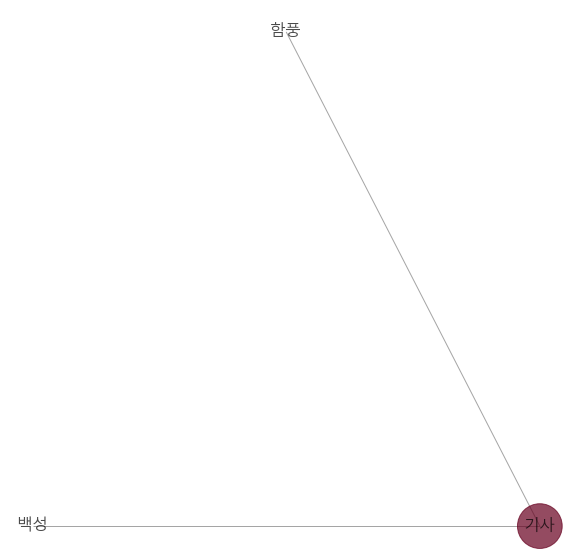

In [309]:
network_g(itemset)

In [ ]:
# api만들어서 웹 혹은 앱과 연동
#키워드, 왕이름, 단어list로 구조가 이루어질것